# Animal Aging and Longevity

[AnAge](https://genomics.senescence.info/species/) is a database of animal ageing and longevity. It contains detailed information about ~4200 specimens that can be used not only for a longevity study but for other analyses as well. The original file is a *tab* separated values, but the course staff has transformed this into a *comma* separated values file. It can be downloaded [here](https://web2.qatar.cmu.edu/cs/15110/resources/anage_data.csv).

The first line of the `.csv` file contains the column names and each row corresponds to one species. There are 31 columns and 4220 rows.

Column names and descriptions are as follows:

| Name                                  | Description                                            | Type   |
| :------------------------------------ | :----------------------------------------------------- | :----- |
| HAGRID                                | Human Ageing Genomic Resources ID                      | int    |
| Kingdom                               | self-explanatory                                       | string |
| Phylum                                | self-explanatory                                       | string |
| Class                                 | self-explanatory                                       | string |
| Order                                 | self-explanatory                                       | string |
| Family                                | self-explanatory                                       | string |
| Genus                                 | self-explanatory                                       | string |
| Species                               | self-explanatory                                       | string |
| Common name                           | self-explanatory                                       | string |
| Female maturity (days)                | self-explanatory                                       | int    |
| Male maturity (days)                  | self-explanatory                                       | int    |
| Gestation/Incubation (days)           | self-explanatory                                       | int    |
| Weaning (days)                        | self-explanatory                                       | int    |
| Litter/Clutch size                    | self-explanatory                                       | float  |
| Litters/Clutches per year             | self-explanatory                                       | float  |
| Inter-litter/Interbirth interval      | self-explanatory                                       | int    |
| Birth weight (g)                      | self-explanatory                                       | float  |
| Weaning weight (g)                    | self-explanatory                                       | float  |
| Adult weight (g)                      | self-explanatory                                       | float  |
| Growth rate (1/days)                  | self-explanatory                                       | float  |
| Maximum longevity (yrs)               | self-explanatory                                       | float  |
| Source                                | Source of the data                                     | string |
| Specimen origin                       | Where the specimen was studies ('wild', 'captivity' or 'unknown') | string |
| Sample size                           | 'tiny' (fewer than 10 specimens), 'small' (10-100), 'medium' (100-1000), 'large' (over 1000) and 'huge' | string |
| Data quality                          | Reliability of the date ('low', 'questionable', 'acceptable' or 'high') | string |
| IMR (per yr)                          | Infant mortality rate                                  | float |
| MRDT (yrs)                            | Mortality rate doubling time (the time required for the mortality rate to double) | float |
| Metabolic rate (W)                    | self-explanatory                                       | float |
| Body mass (g)                         | self-explanatory                                       | float |
| Temperature (K)                       | self-explanatory                                       | float |
| References                            | self-explanatory                                       | string |

The data is stored in a list of dictionaries. Unless we know how to index specimens by their HAGRID, having a dictionary of dictionaries will not be very useful in this case. Each dictionary in the list contains the column name and value for one specimen.

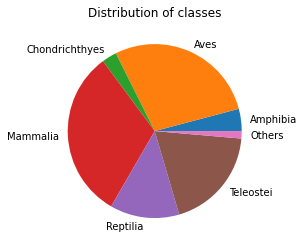

In [1]:
import csv
import matplotlib.pyplot as plt

def readFile(filename):
    file = open(filename)
    lines = file.readlines()
    col_names = lines[0].strip().split(',')
    
    dataset = []
    for line in lines[1:]:
        vals = line.strip().split(',')
        
        d = {}
        for i in range(len(col_names)):
            d[col_names[i]] = vals[i]
            
        dataset += [d]
        
    return dataset

dataset = readFile("anage_data.csv")

def getClassesDict(dataset):
    classes = {}
    for entry in dataset:
        c = entry["Class"]
        if c in classes:
            classes[c] += 1
        else:
            classes[c] = 1
            
    return classes

classes = getClassesDict(dataset)

# Classes with a few specimens are crammed up in the chart
#quant = list(classes.values())
#labels = list(classes.keys())

quant = []
labels = []
others = 0
for c in classes:
    if classes[c] > 100:
        labels += [c]
        quant += [classes[c]]
    else:
        others += classes[c]

quant += [others]
labels += ["Others"]

#plt.figure(figsize=(8,8))
plt.title("Distribution of classes")
plt.pie(quant,labels=labels)
plt.show()

## Birth vs adult weight

What is the animal with the highest difference between birth and adult weight?

In [2]:
max_diff = 0
animal = ""

for d in dataset:
    bw = d['Birth weight (g)']
    aw = d['Adult weight (g)']
    
    if bw != '' and aw != '':
        bw = float(bw)
        aw = float(aw)
    
        diff = aw - bw
        if diff > max_diff:
            max_diff = diff
            animal = d['Common name']
        
print("Max difference:", max_diff, "g")
print("Animal:", animal)

Max difference: 134000000.0 g
Animal: Blue whale


## Growth rate

What are the animals with the highest and lowest growth rates?

In [3]:
max_gr = 0
min_gr = 1
animal_max = ""
animal_min = ""
growth_rates = []
for d in dataset:
    gr = d['Growth rate (1/days)']
    if gr != '':
        gr = float(gr)
        growth_rates += [gr]
        if gr > max_gr:
            max_gr = gr
            animal_max = d['Common name']
            
        if gr < min_gr:
            min_gr = gr
            animal_min = d['Common name']
            
        
print("Maximum growth rate:", max_gr)
print("Animal:", animal_max)
print()
print("Minimum growth rate:", min_gr)
print("Animal:", animal_min)

Maximum growth rate: 0.68
Animal: American redstart

Minimum growth rate: 0.0003
Animal: African bush elephant


How does the growth rates distribute across the possible values?

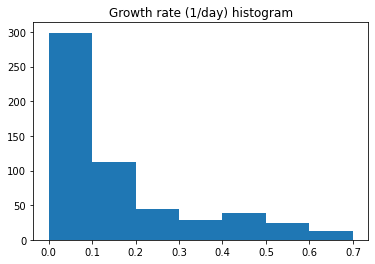

In [4]:
plt.title("Growth rate (1/day) histogram")
plt.hist(growth_rates, [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7])
plt.show()

## Body mass vs metabolic rate

How does the body mass relate to the metabolic rate?

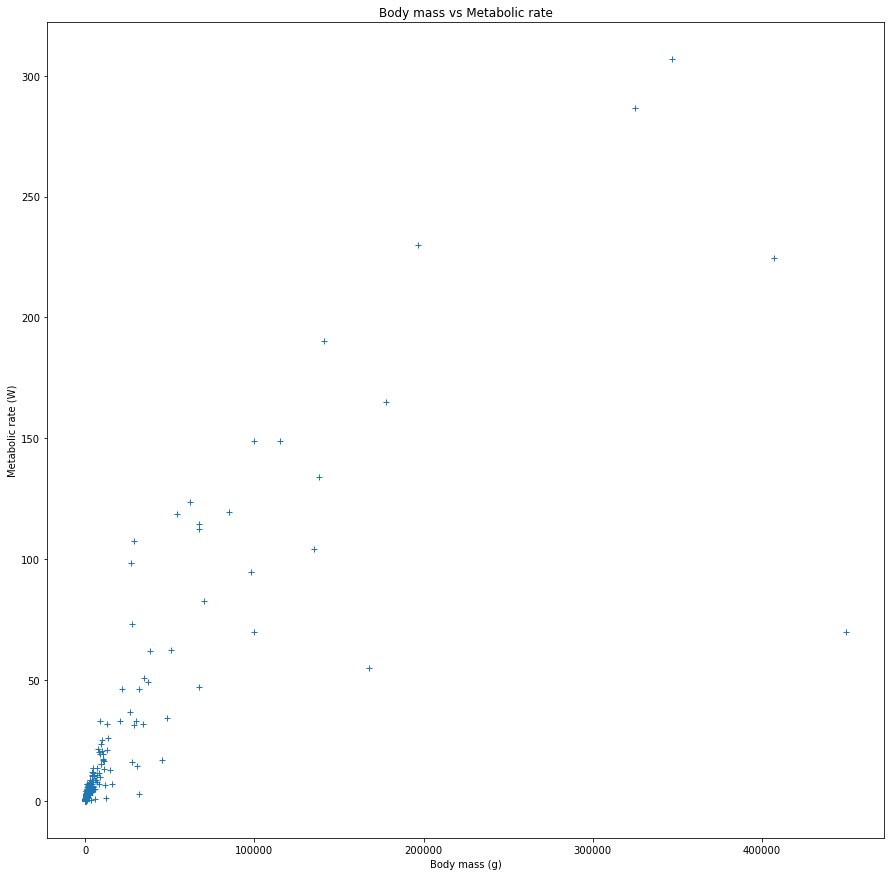

In [5]:
met_rate = []
body_mass = []

for d in dataset:
    bm = d['Body mass (g)']
    mr = d['Metabolic rate (W)']
    
    if bm != '' and mr != '':
        mr = float(mr)
        bm = float(bm)
        
        if mr < 2000: # Removing the outlier
            met_rate += [mr]
            body_mass += [bm]
        
plt.figure(figsize=(15,15))

plt.title("Body mass vs Metabolic rate")

plt.xlabel("Body mass (g)")

plt.ylabel("Metabolic rate (W)")

plt.plot(body_mass, met_rate, '+')
plt.show()